# Iris Project - Aditya Sonar

In [1]:

from warnings import filterwarnings
filterwarnings('ignore')

## Iris data explained


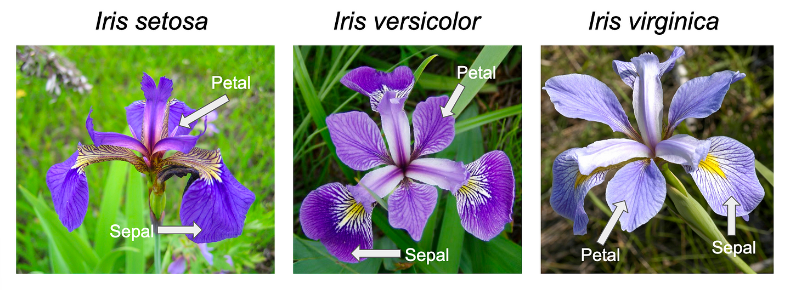

## Step 1: Read the dataset


In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: Perform basic data quality checks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()


1

## Step 3: Seperate X and Y


In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()


species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

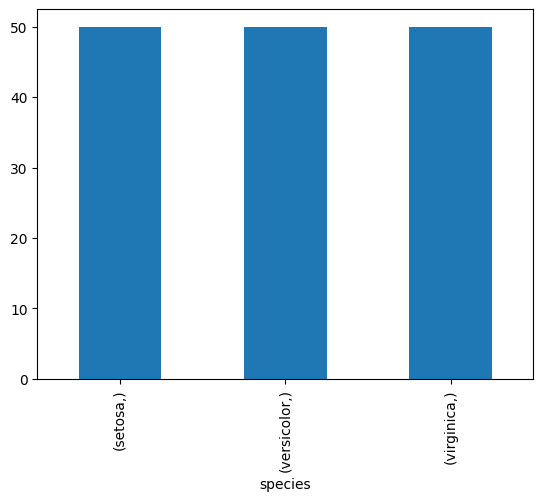

In [10]:
Y.value_counts().plot(kind='bar')


## Step 4: Apply Preprocessing on X


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Saving preprocessor in pickle format


In [14]:
num_pipe


Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [15]:
import pickle 
with open('pre.pkl', 'wb') as file1:
    pickle.dump(num_pipe, file1)

## Step 5: Train test split

In [16]:

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [17]:
xtrain.head()


,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [18]:
ytrain.head()


,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [19]:
xtest.head()


,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [20]:
ytest.head()


,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [21]:
xtrain.shape


(100, 4)

In [22]:
xtest.shape


(50, 4)

## Step 6: Build the model


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [24]:
model.score(xtrain, ytrain)


0.96

In [25]:
model.score(xtest, ytest)


0.98

In [26]:
# Save the model 
with open('model.pkl', 'wb') as file2:
    pickle.dump(model, file2)

## Step 7: Evaluate the model


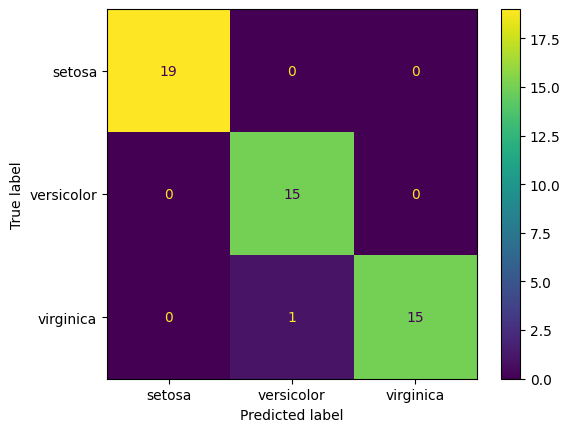

In [27]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [28]:
# Predict results for train and test
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [29]:

# Print classification report 
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [30]:
# Cross validate the model on train data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [31]:
scores.mean()


0.9319552669552669

## Above logistic regression model has cross validated f1 score of 0.9319 , Hence above is good model and can be used for predictions
## How to load preprocessor and model in another file

In [32]:
with open('pre.pkl', 'rb') as file3:
    p = pickle.load(file3)

In [33]:
p


Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [34]:

with open('model.pkl', 'rb') as file4:
    m = pickle.load(file4)

In [35]:
m

LogisticRegression()